In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

my_colors = plt.rcParams['axes.prop_cycle']()
sns.set_theme()
import benchmarking_v1 as bm

import numpy as np


# read data from the results file

In [2]:
dataset_lst=    ["birds",
    "yeast",
    "emotions",
    "scene", 
    "reuters",
    "image"]

In [3]:


def read_data(dataset):
    df_total=pd.DataFrame()
    dataset=dataset
    nr_labels=bm._dataset_names_nr_labels[dataset]
    order=list(range(nr_labels))
    for i in range(0,19):
        order=bm.random_order(nr_labels,i)
        ord_str="_".join([str(x) for x in order])
        directory = f"../results/{dataset}/{ord_str}/"

        for filename in os.listdir(directory):
            if filename.startswith("") and filename.endswith("bench.csv"):
                d=pd.read_csv(os.path.join(directory, filename))
                df_total=pd.concat([df_total,d])


    df_total["best_value"]=-df_total["best_value"]
    df_total.sort_values(by="algo_name",inplace=True)
    return df_total

def invert_order(dataset="emotions"):
    df_total=read_data(dataset=dataset)
    nr_labels=bm._dataset_names_nr_labels[dataset]
    df_inv=df_total[[f"classifiers_{i}" for i in range(nr_labels)]+["order"]]
    df_inv=df_inv.reset_index(drop=True)
    value=df_inv[[f"classifiers_{i}" for i in range(nr_labels)]].values
    temp_val=[]
    for ind in df_inv.index:
        order=np.array([int(i) for i in df_inv["order"][ind].split("_")])
        v=value[ind]
        v=v[order]
        temp_val.append(v)

    
    # row["pos_0"]=row[f"classifiers_{order[0]}"]

    df_inverted=pd.DataFrame(temp_val,columns=[f"label_{i}" for i in range(nr_labels)])
    return df_inverted

# Plots

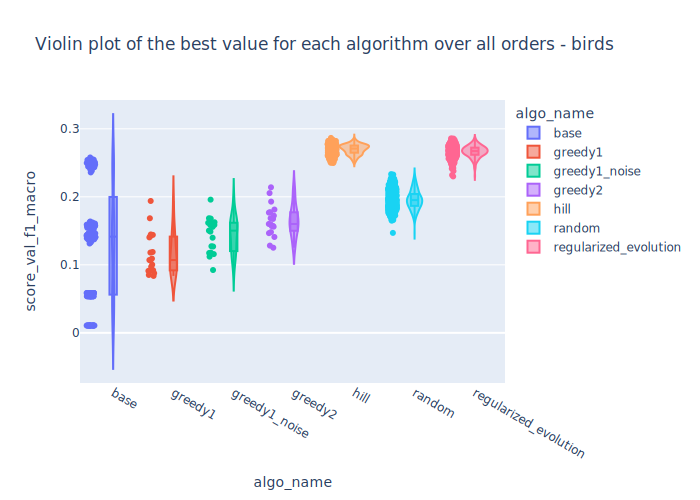

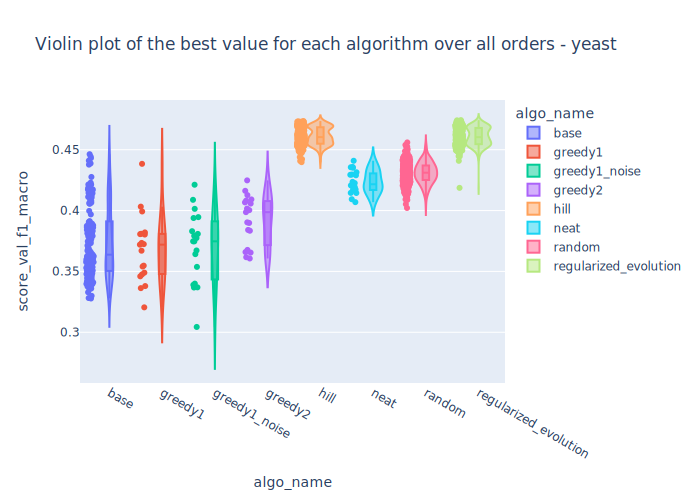

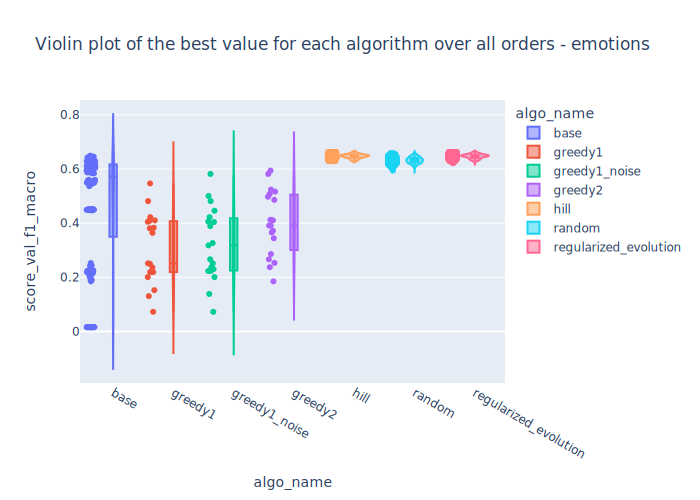

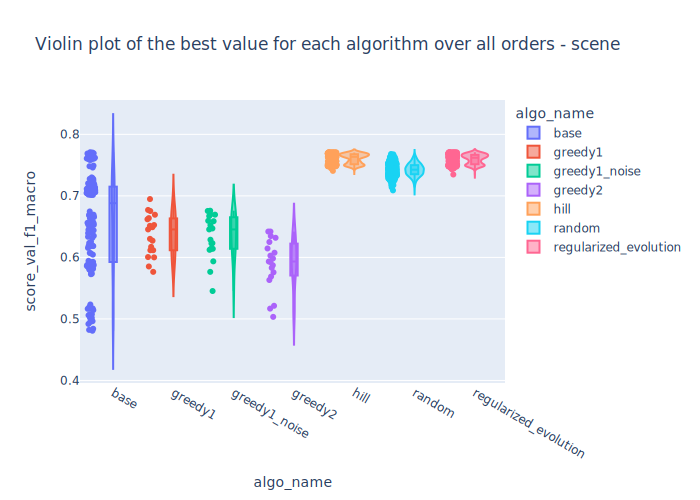

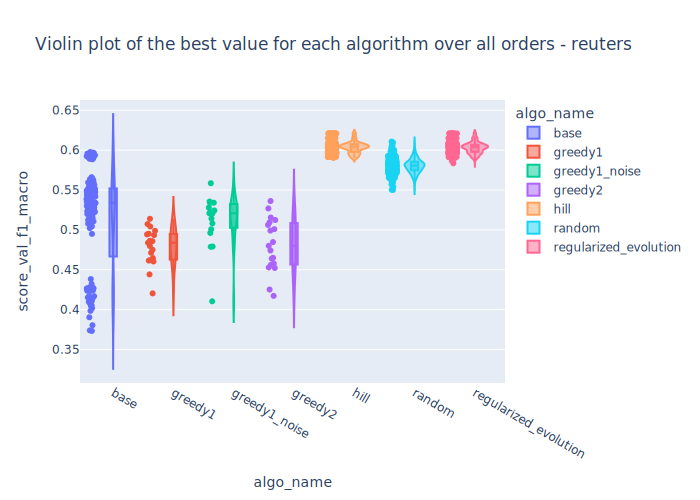

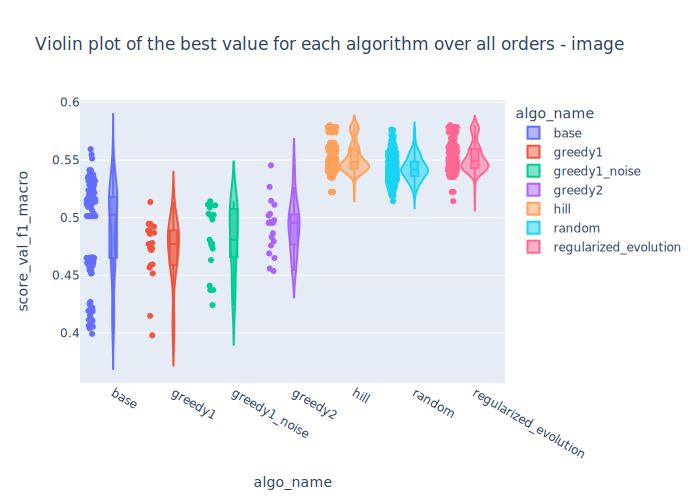

In [4]:
for ds in dataset_lst:
    df_total2=read_data(dataset=ds)
    df_total2.sort_values(by="algo_name",inplace=True)

    nr_labels=bm._dataset_names_nr_labels[ds]
    fig = px.histogram(df_total2[~df_total2.algo_name.isin(["base"])], x=[f"classifiers_{i}" for i in range(nr_labels)],title=f"histogram of base learners over all orders - {ds}",color="algo_name",barmode="group",histnorm="probability density")

    fig.show()
    fig=px.violin(df_total2, y="score_val_f1_macro", x="algo_name", color="algo_name", box=True, points="all", hover_data=df_total2.columns,title=f"Violin plot of the best value for each algorithm over all orders - {ds}")

    fig.show("svg")

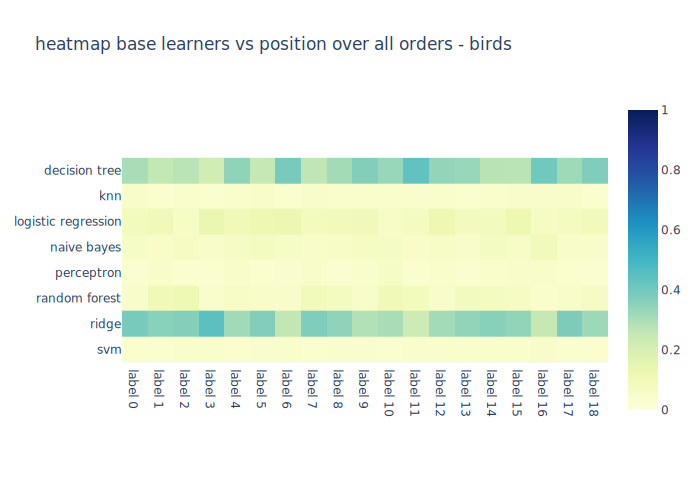

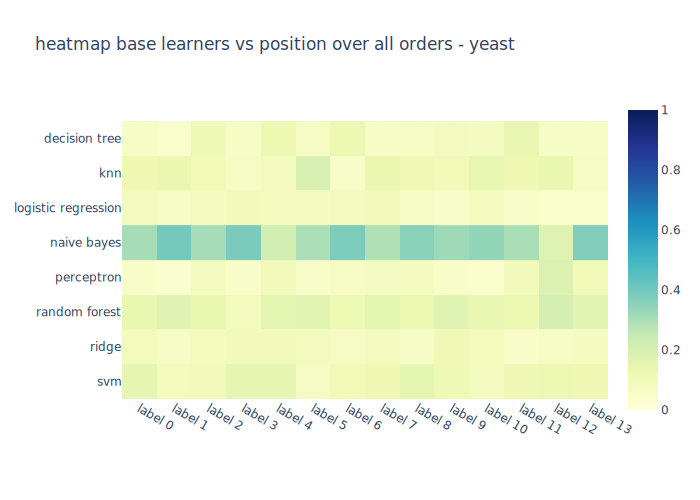

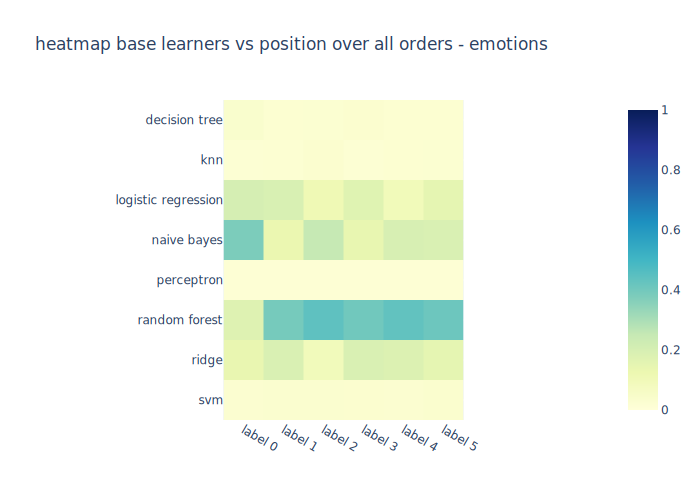

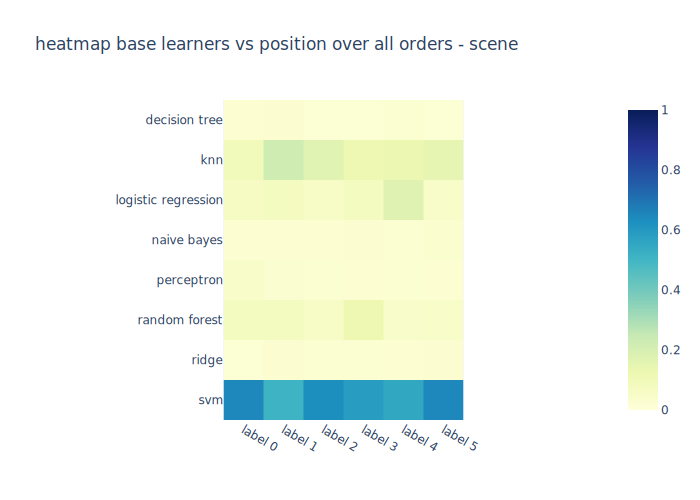

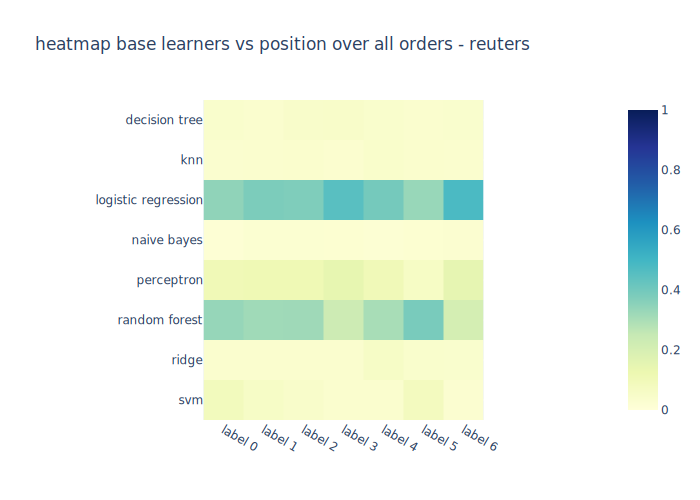

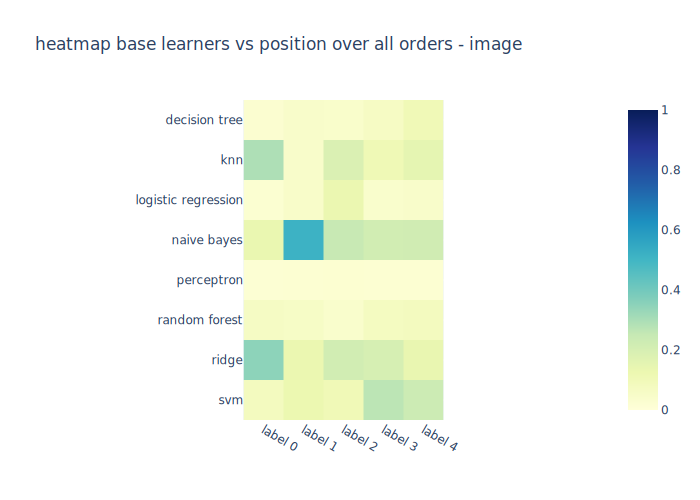

In [5]:
for ds in dataset_lst:
    nr_labels=bm._dataset_names_nr_labels[ds]
    df_total2=invert_order(ds)
    test_df=pd.DataFrame()
    for i in range(nr_labels):
        df_temp2=df_total2[f"label_{i}"].value_counts(normalize=True)
        df_temp2.name=f"label {i}"
        
        test_df=pd.concat([test_df,df_temp2],axis=1)

    test_df.fillna(0,inplace=True)
    test_df.sort_index(inplace=True)
    test_df=test_df.rename(columns=lambda name: name.replace('_', ' '))
    test_df=test_df.rename(index=lambda name: name.replace('_', ' '))
    
    fig=px.imshow(test_df,color_continuous_scale="YlGnBu",zmax=1,zmin=0,title=f"heatmap base learners vs position over all orders - {ds}")



    fig.show("svg")

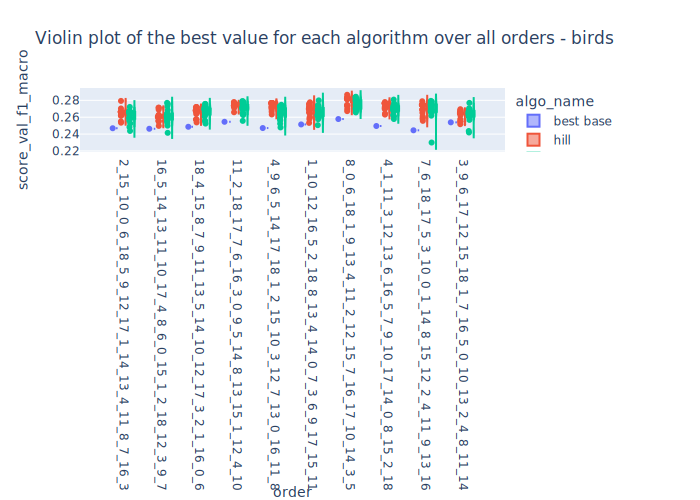

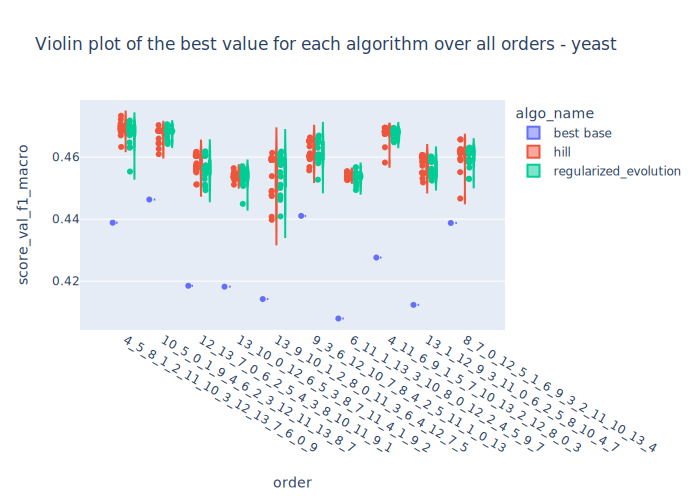

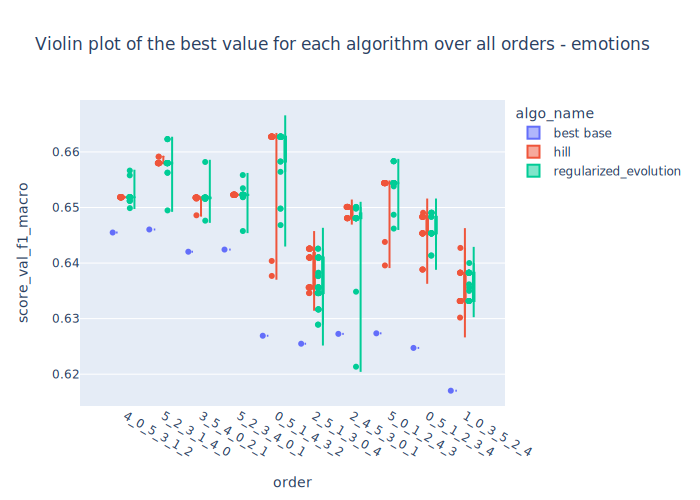

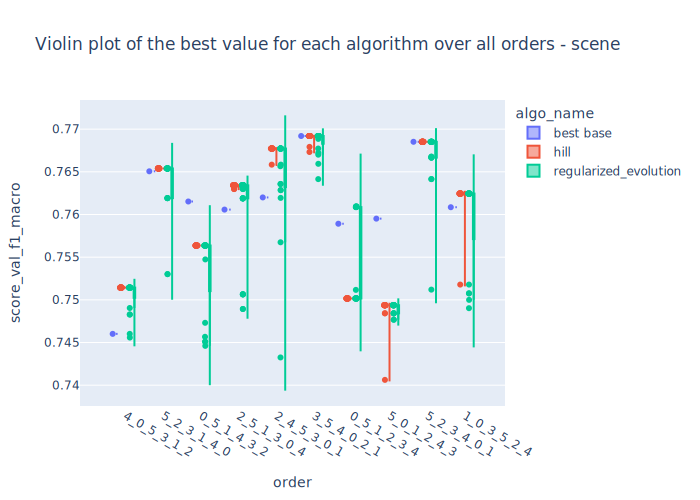

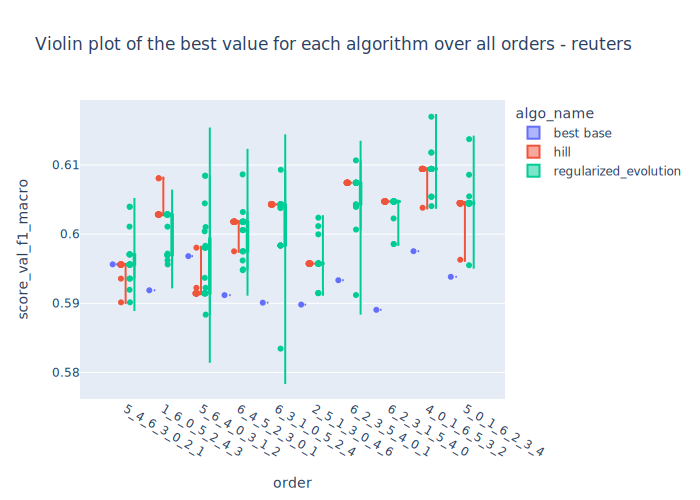

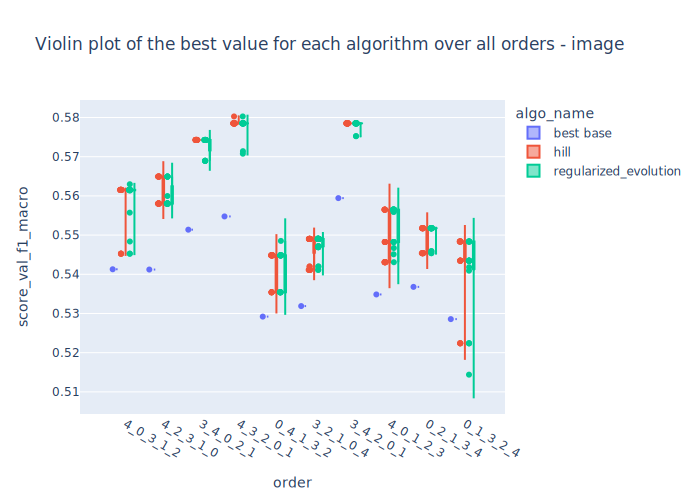

In [6]:
for ds in dataset_lst:
    df_total2=read_data(dataset=ds)
    df_total2.sort_values(by="algo_name",inplace=True)
    df_total2.reset_index(inplace=True)
    df_total2["algo_name"] = df_total2["algo_name"].where(df_total2["algo_name"] != "base", df_total2["algo_name"] +"_"+ df_total2["classifiers_0"])
    best_index = df_total2[df_total2["algo_name"].str.contains("base")].groupby("order")["score_val_f1_macro"].idxmax()
    df_total2.loc[best_index,"algo_name"] = "best base"
        
    df_table1=df_total2.groupby("algo_name").agg({'score_val_f1_macro': ['mean']})
    nr_labels=bm._dataset_names_nr_labels[ds]
    fig=px.violin(df_total2[df_total2.algo_name.isin(["hill","regularized_evolution","best base"])&df_total2.order.isin(df_total2["order"].unique()[1:11])], y="score_val_f1_macro", x="order", color="algo_name", box=True, points="all", hover_data=df_total2.columns,title=f"Violin plot of the best value for each algorithm over all orders - {ds}")

    fig.show("svg")

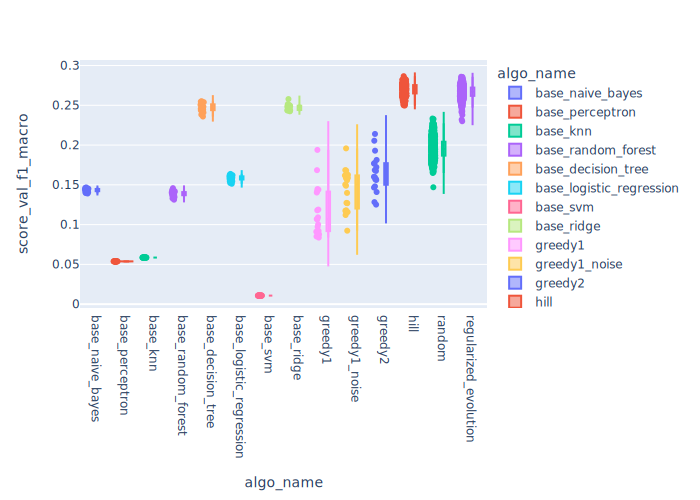

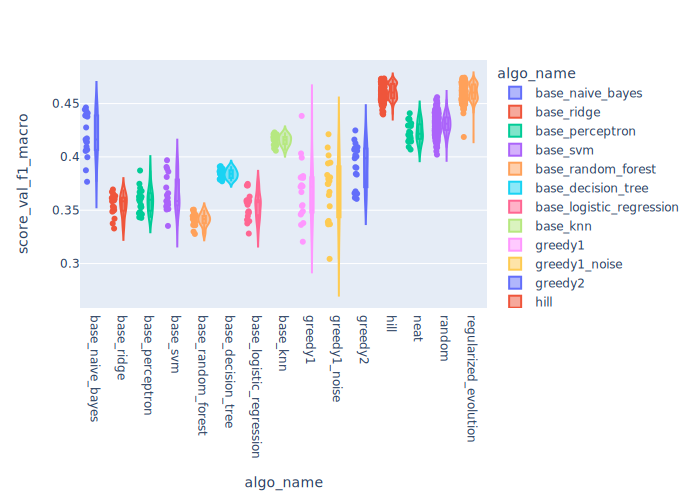

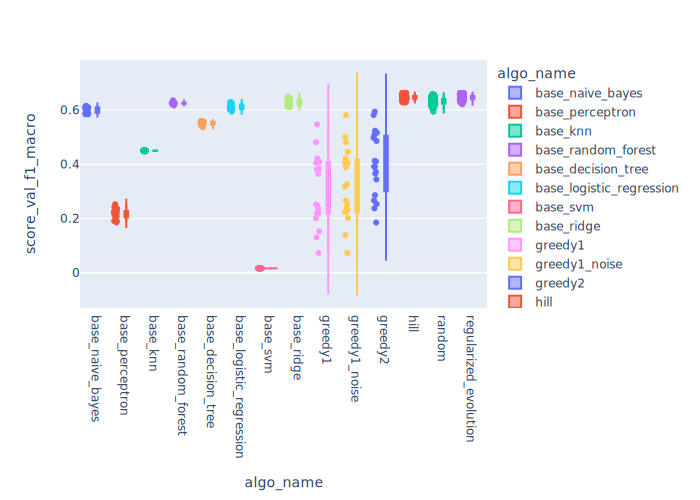

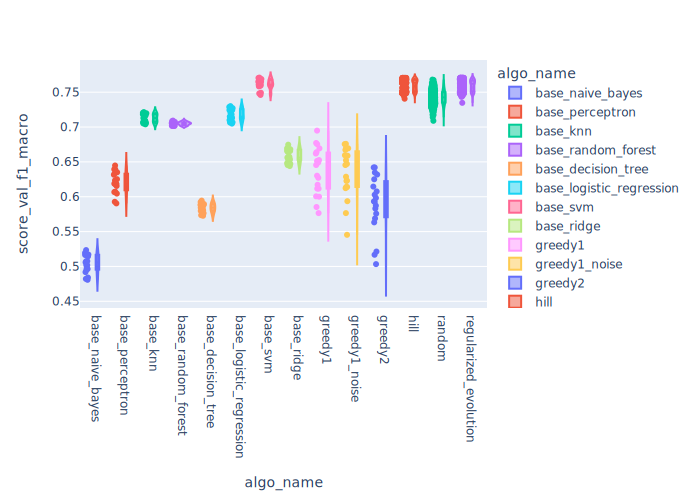

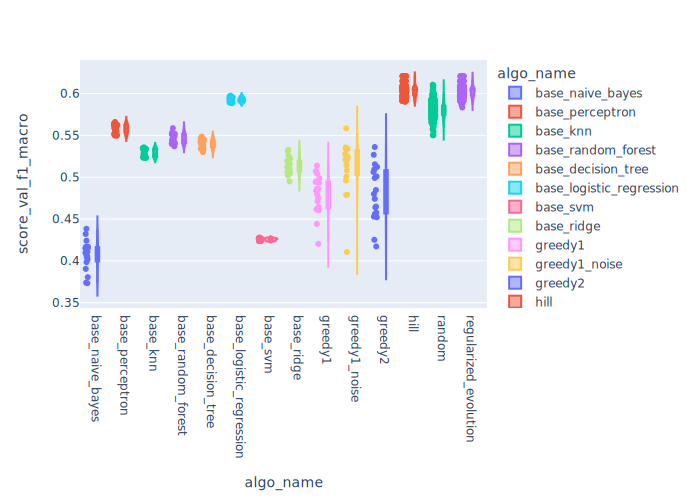

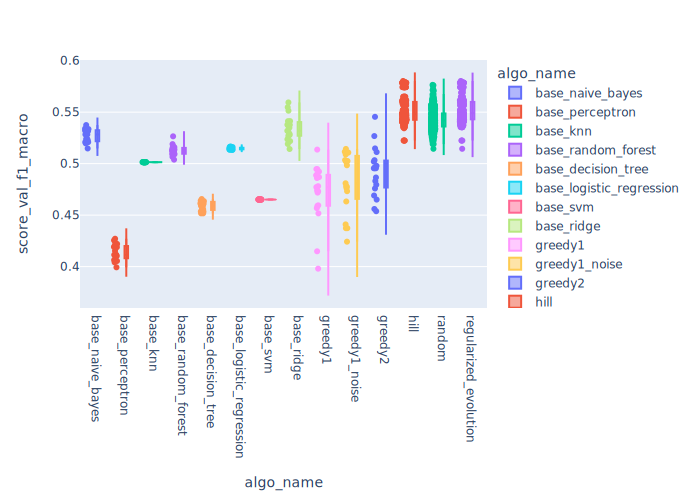

In [7]:
for ds in dataset_lst:
    df_total2=read_data(dataset=ds)
    df_total2.sort_values(by="algo_name",inplace=True)
    df_total2.reset_index(inplace=True)
    df_total2["algo_name"] = df_total2["algo_name"].where(df_total2["algo_name"] != "base", df_total2["algo_name"] +"_"+ df_total2["classifiers_0"])
    
    fig=px.violin(df_total2, y="score_val_f1_macro", x="algo_name", color="algo_name", box=True, points="all", hover_data=df_total2.columns)
    fig.show("svg")